In [16]:
import torch
import json
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter("ignore")

In [17]:
def load_exp(setting):
    folder = "../exps"
    json_file = "exp.json"
    json_path = os.path.join(folder, setting, json_file)
    with open(json_path, "r") as f:
        exp = json.load(f)
    
    models_tensors = exp["models_tensors"]
    models_state_dicts = torch.load(models_tensors)
    

    return {"permutation_seed": exp["permutation_seed"],
            "test_size": exp["test_size"],
            "partition_seed": exp["partition_seed"],
            "n_class": exp["n_class"],
            "all_tr_loss": exp["all_tr_loss"], 
            "all_test_loss": exp["all_test_loss"],
            "all_tr_acc": exp["all_tr_acc"],
            "all_test_acc": exp["all_test_acc"],
            "models_state_dicts": models_state_dicts
    }

In [18]:
exp1 = load_exp("Setting_1")

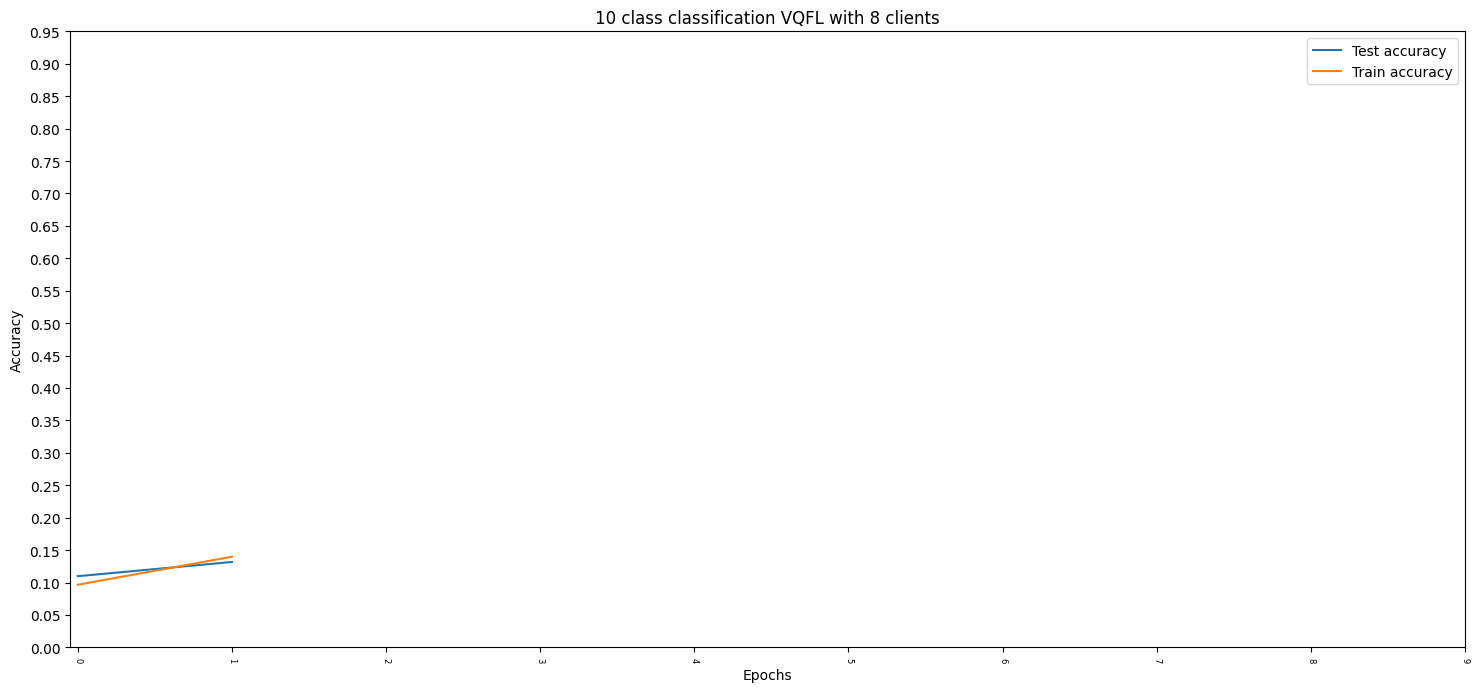

In [19]:
plt.figure(figsize=(18, 8))
plt.plot(exp1["all_test_acc"], label="Test accuracy")
plt.plot(exp1["all_tr_acc"], label="Train accuracy")
# plt.plot(all_all_test_acc_client1[0], label="client128")
# plt.plot(all_all_test_acc_client2[0], label="client64")
plt.xticks(np.arange(0, 10), rotation=-90, size=6)
plt.yticks(np.arange(0,1,0.05))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

n_class = exp1["n_class"]
n_clients = 8
plt.title(f"{n_class} class classification VQFL with {n_clients} clients")
plt.legend()
plt.show()